# Exercise 2

In [1]:
# the libraries
import pandas

import matplotlib.pyplot as plt #main plotting tool for python

import numpy as np

<span style="color:black; font-weight:700;font-size:18px"> Διαβάζουμε και κάνουμε sort τον πίνακα μας </span>

In [2]:
# read data
data = pandas.read_csv('data.csv')
# sort data by A
dfs = data.sort_values(by='A', ascending = True) 

<span style="color:black; font-weight:700;font-size:18px"> Για αρχή κάνουμε την πιο αφελή προσέγγιση, προσπαθούμε με το "μάτι" να βρούμε μια πολυωνυμική συνάρτηση που να ταιριάζει στα δεδομένα μας. Καταφέρνουμε να βρούμε κάποιες τιμές, αλλά είναι απατηλές. </span>

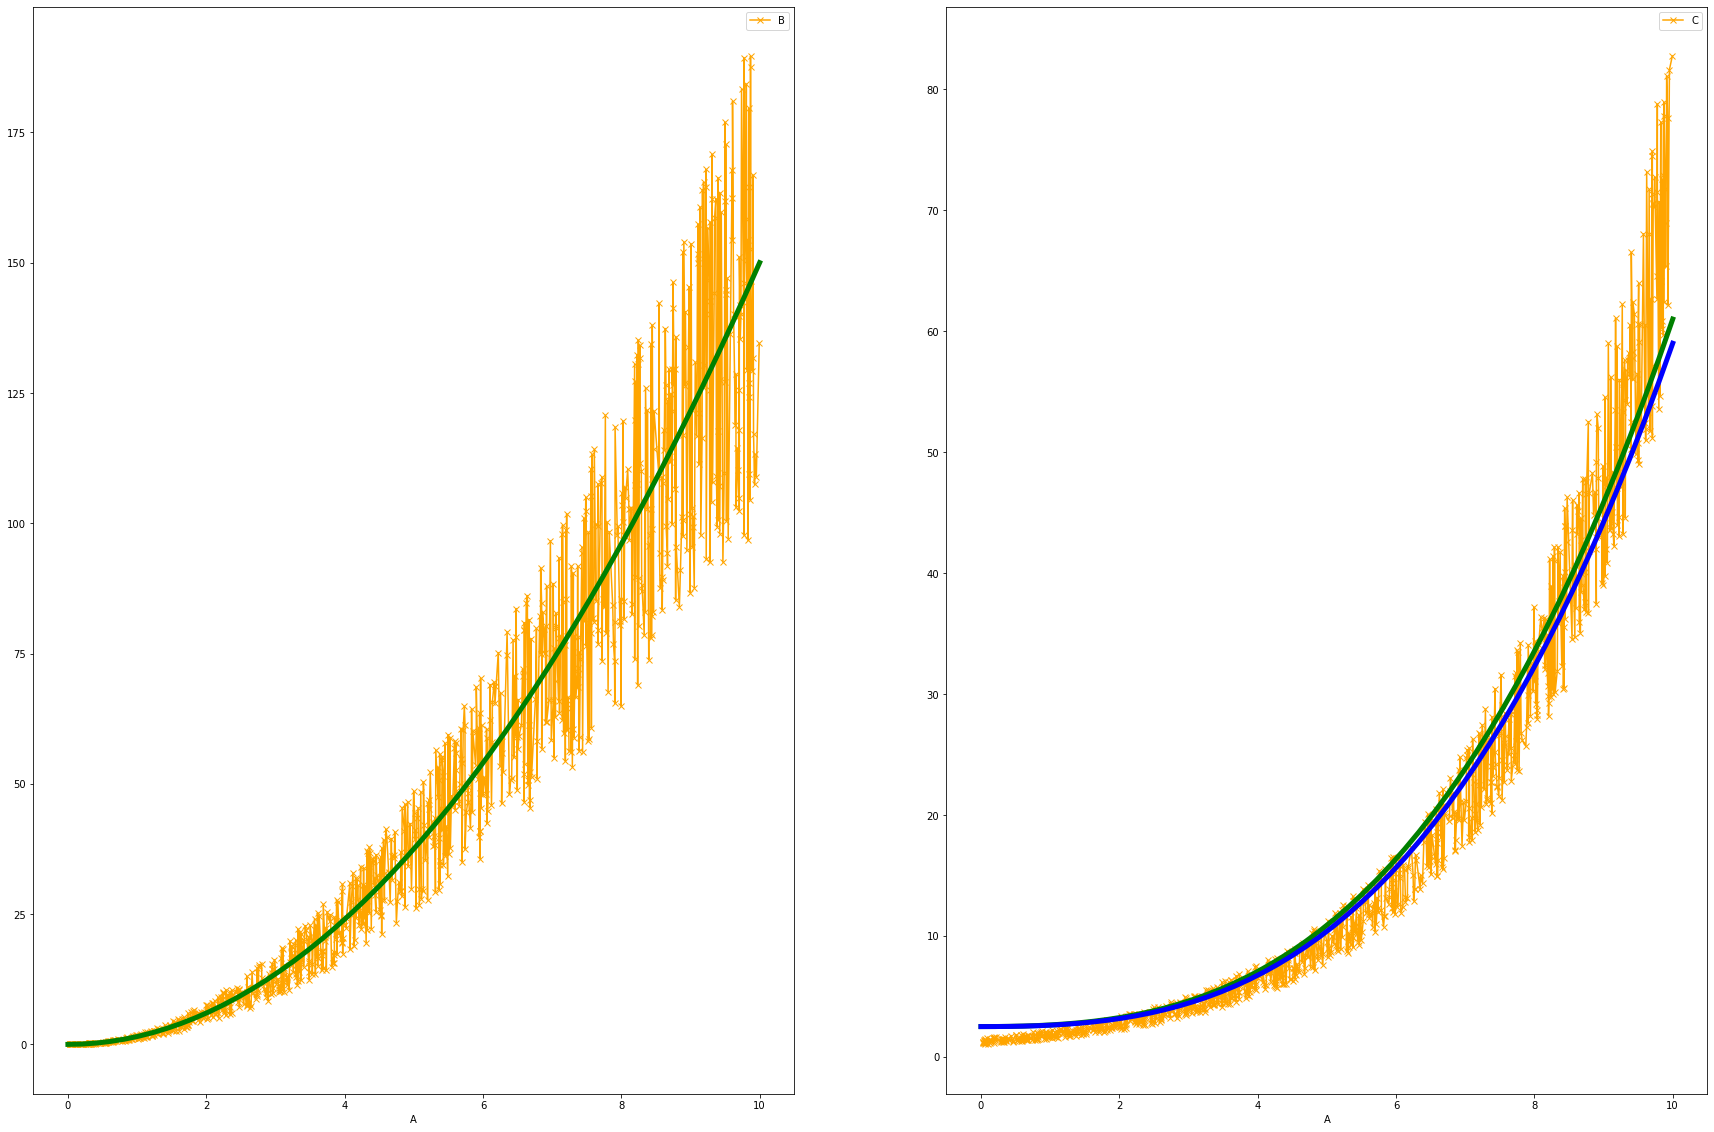

In [3]:
def f(x,a):
    return a*x*x

def f2(x,a,b,c):
    return a*x*x*x+b*x*x+c


x = np.linspace(0, 10)
fig, ax = plt.subplots(1,2,figsize=(30,20))
plt.rcParams["figure.figsize"] = [30, 20]
dfs.plot(x = 'A', y = 'B', ax = ax[0], marker='x',color='orange');
ax[0].plot(x, f(x,1.5),color='green', linewidth=5)


dfs.plot(x = 'A', y = 'C', ax = ax[1], marker='x',color='orange');
ax[1].plot(x, f2(x,0.05,0.085,2.5),color='green', linewidth=5)
ax[1].plot(x, f2(x,0.05,0.065,2.5),color='blue', linewidth=5)

<span style="color:black; font-weight:700;font-size:18px"> Με το να λογαριθμήσουμε θα μπορέσουμε να δούμε αν οι συναρτήσεις μας είναι πολυωνυμικές ή εκθετικές. Αν ύστερα από την μετατροπή κρατήσει την καμπυλότητα είναι εκθετική, αλλιώς είναι πολωνυμική. Έτσι βλέπουμε ότι η σχέση Α-Β είναι πολυωνυμική και η σχέση Α-C είναι εκθετική. </span>

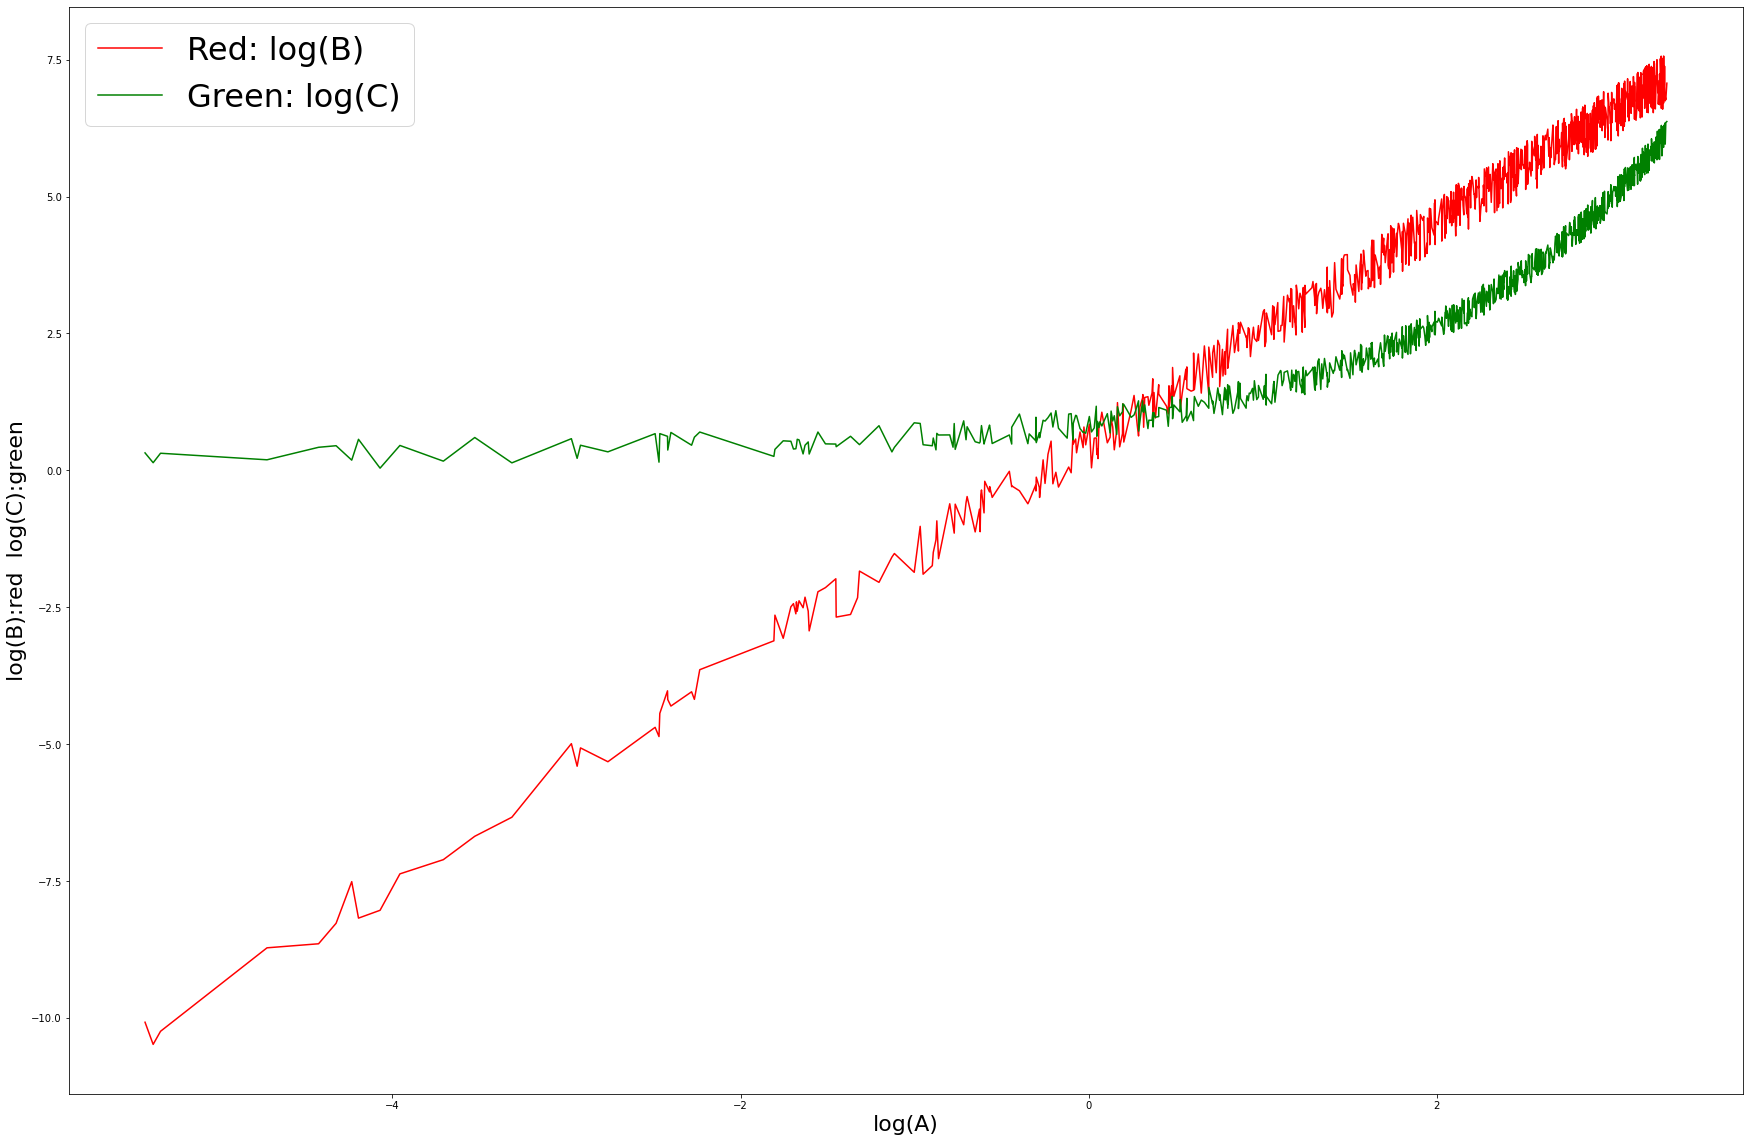

In [4]:
logA = np.log2(dfs.A)
logB = np.log2(dfs.B)
logC = np.log2(dfs.C)

plt.rcParams["figure.figsize"] = [30, 20]
plt.plot(logA,logB,'r', label = "Red: log(B)")

plt.plot(logA,logC,'g', label = "Green: log(C)")
plt.xlabel("log(A)",fontsize=22)
plt.ylabel('log(B):red  log(C):green', fontsize=22)

plt.legend(loc ="upper left", fontsize=32)
plt.show()

<span style="color:black; font-weight:700;font-size:20px"> Σχέση Α-Β </span>

<span style="color:black; font-weight:700;font-size:17px"> 
Τώρα που ξέρουμε ότι είναι πολυωνυμική θα προσπαθήσουμε να κάνουμε fit τα δεδομένα μας σε πολυωνυμικές συναρτήσεις πολλών βαθμών. Όσο ανεβαίνουμε μετά τον δεύτερο βαθμό, βλέπουμε ότι το βάρος στον συντελεστή με τον υψηλότερο βαθμό χαμηλώνει, οπότε συμπεραίνουμε ότι η σχέση Α-Β είναι δευτέρου βαθμού, πράγμα που στηρίζεται βλέποντας την γραφική παράσταση τους. Όλες οι πολυωνυμικές σχέσεις πλησιάζουν την σχέση δευτέρου βαθμού.</span>

Weights of 2nd degree:
       2
1.448 x + 0.4203 x - 0.54
---------------------------------
Weights of 3rd degree:
          3         2
-0.01656 x + 1.696 x - 0.5633 x + 0.2683
---------------------------------
Weights of 4th degree:
           4           3         2
-0.003945 x + 0.06245 x + 1.188 x + 0.5621 x - 0.287
---------------------------------
Weights of 5th degree:
           5           4          3         2
-0.004126 x + 0.09897 x - 0.8493 x + 4.589 x - 4.264 x + 1.302


<Figure size 2160x1440 with 0 Axes>

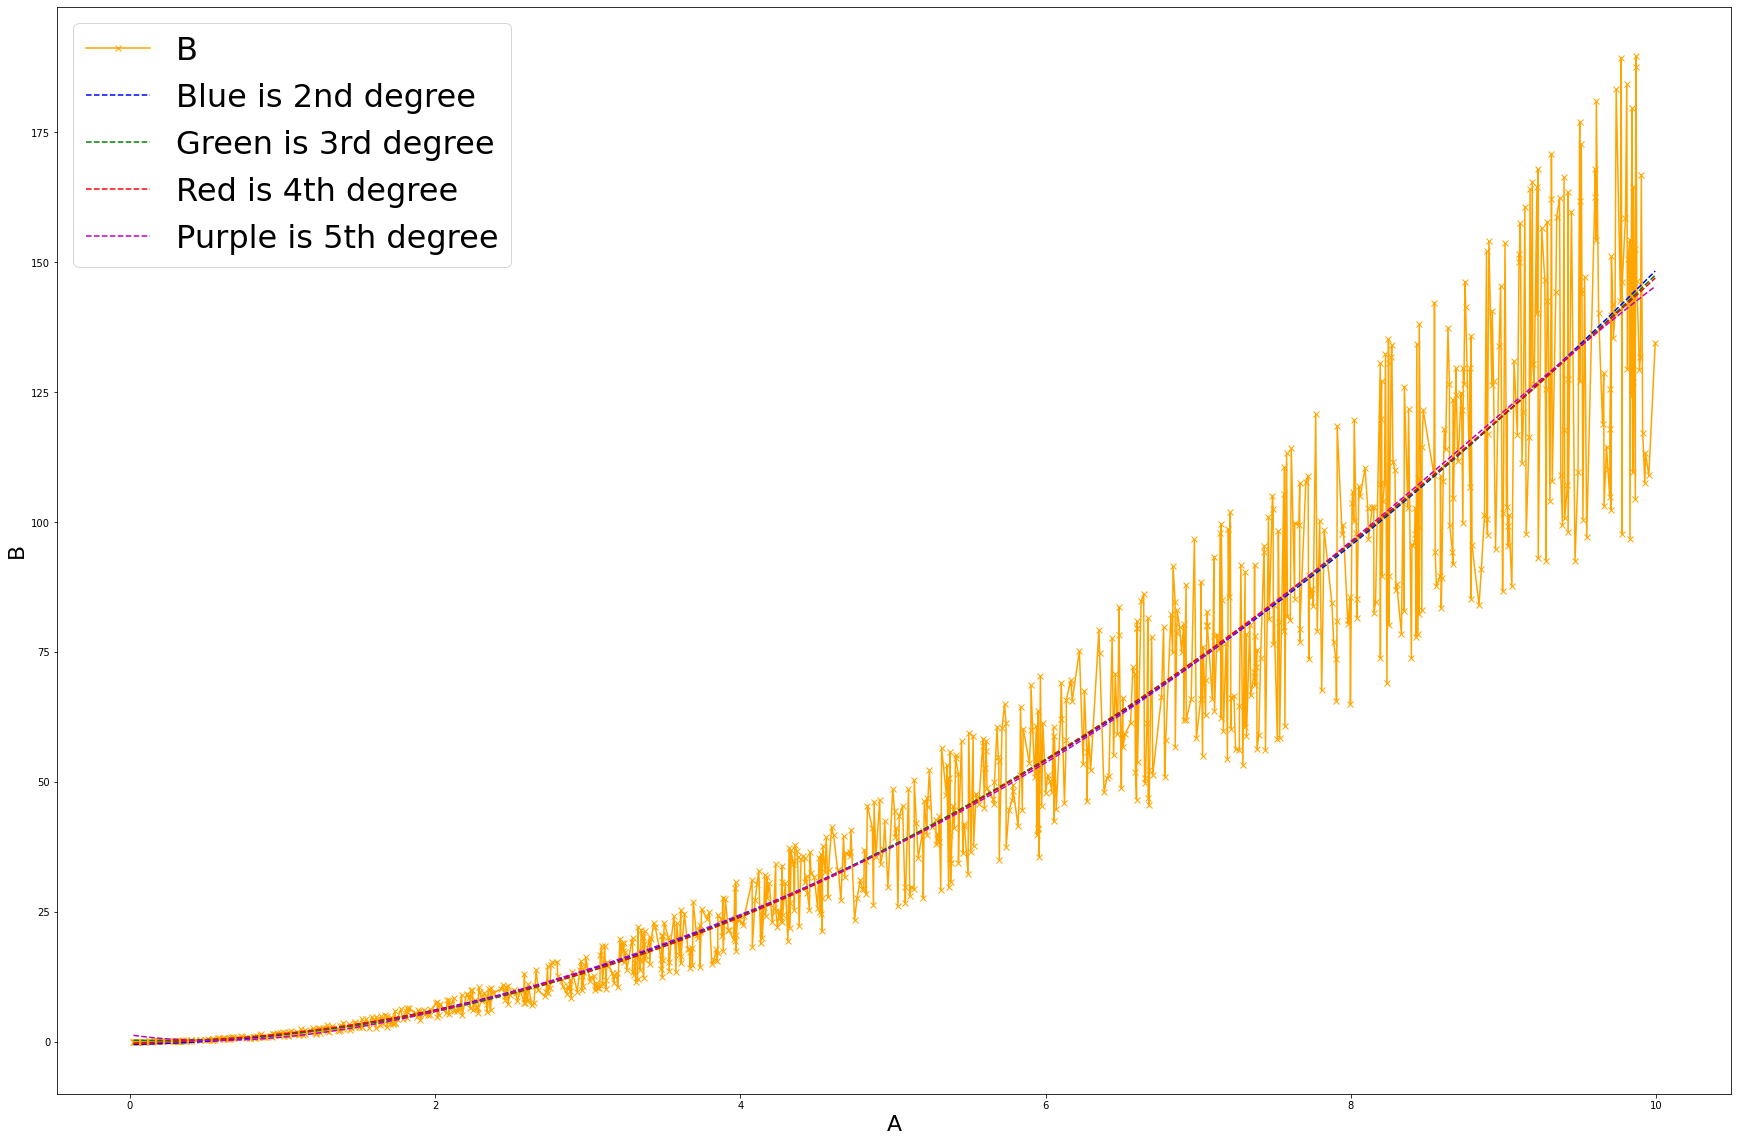

In [5]:
fit2 = np.polyfit(dfs.A, dfs.B,2)
fit_line2 = np.poly1d(fit2)
print("Weights of 2nd degree:")
print(fit_line2)
print("---------------------------------")

fit3 = np.polyfit(dfs.A, dfs.B,3)
fit_line3 = np.poly1d(fit3)
print("Weights of 3rd degree:")
print(fit_line3)
print("---------------------------------")

fit4 = np.polyfit(dfs.A, dfs.B,4)
fit_line4 = np.poly1d(fit4)
print("Weights of 4th degree:")
print(fit_line4)
print("---------------------------------")

fit5 = np.polyfit(dfs.A, dfs.B,5)
fit_line5 = np.poly1d(fit5)
print("Weights of 5th degree:")
print(fit_line5)

plt.figure()

x = np.linspace(0, 10)
dfs.plot(x = 'A', y = 'B', marker='x',color='orange');

plt.plot(dfs.A,fit_line2(dfs.A),'--b', label='Blue is 2nd degree')
plt.xlabel("A",fontsize=22)
plt.ylabel('B', fontsize=22)

plt.plot(dfs.A,fit_line3(dfs.A),'--g', label='Green is 3rd degree')
plt.xlabel("A",fontsize=22)
plt.ylabel('B', fontsize=22)

plt.plot(dfs.A,fit_line4(dfs.A),'--r', label='Red is 4th degree')
plt.xlabel("A",fontsize=22)
plt.ylabel('B', fontsize=22)

plt.plot(dfs.A,fit_line5(dfs.A),'--m', label='Purple is 5th degree')
plt.xlabel("A",fontsize=22)
plt.ylabel('B', fontsize=22)

plt.legend(loc ="upper left", fontsize=32)


plt.show()

<span style="color:black; font-weight:700;font-size:20px"> Σχέση Α-C </span>

<span style="color:black; font-weight:700;font-size:17px"> 
Τώρα που ξέρουμε ότι είναι εκθετική θα προσπαθήσουμε να κάνουμε fit τα δεδομένα μας, μα πρώτα θα χρειαστεί να τα λογαριθμήσουμε προκειμένου να βρούμε τους συντελεστές της εκθετικής συνάρτησης.</span>

Exponential:
0.20260597640200922 0.4055388039241783


<Figure size 2160x1440 with 0 Axes>

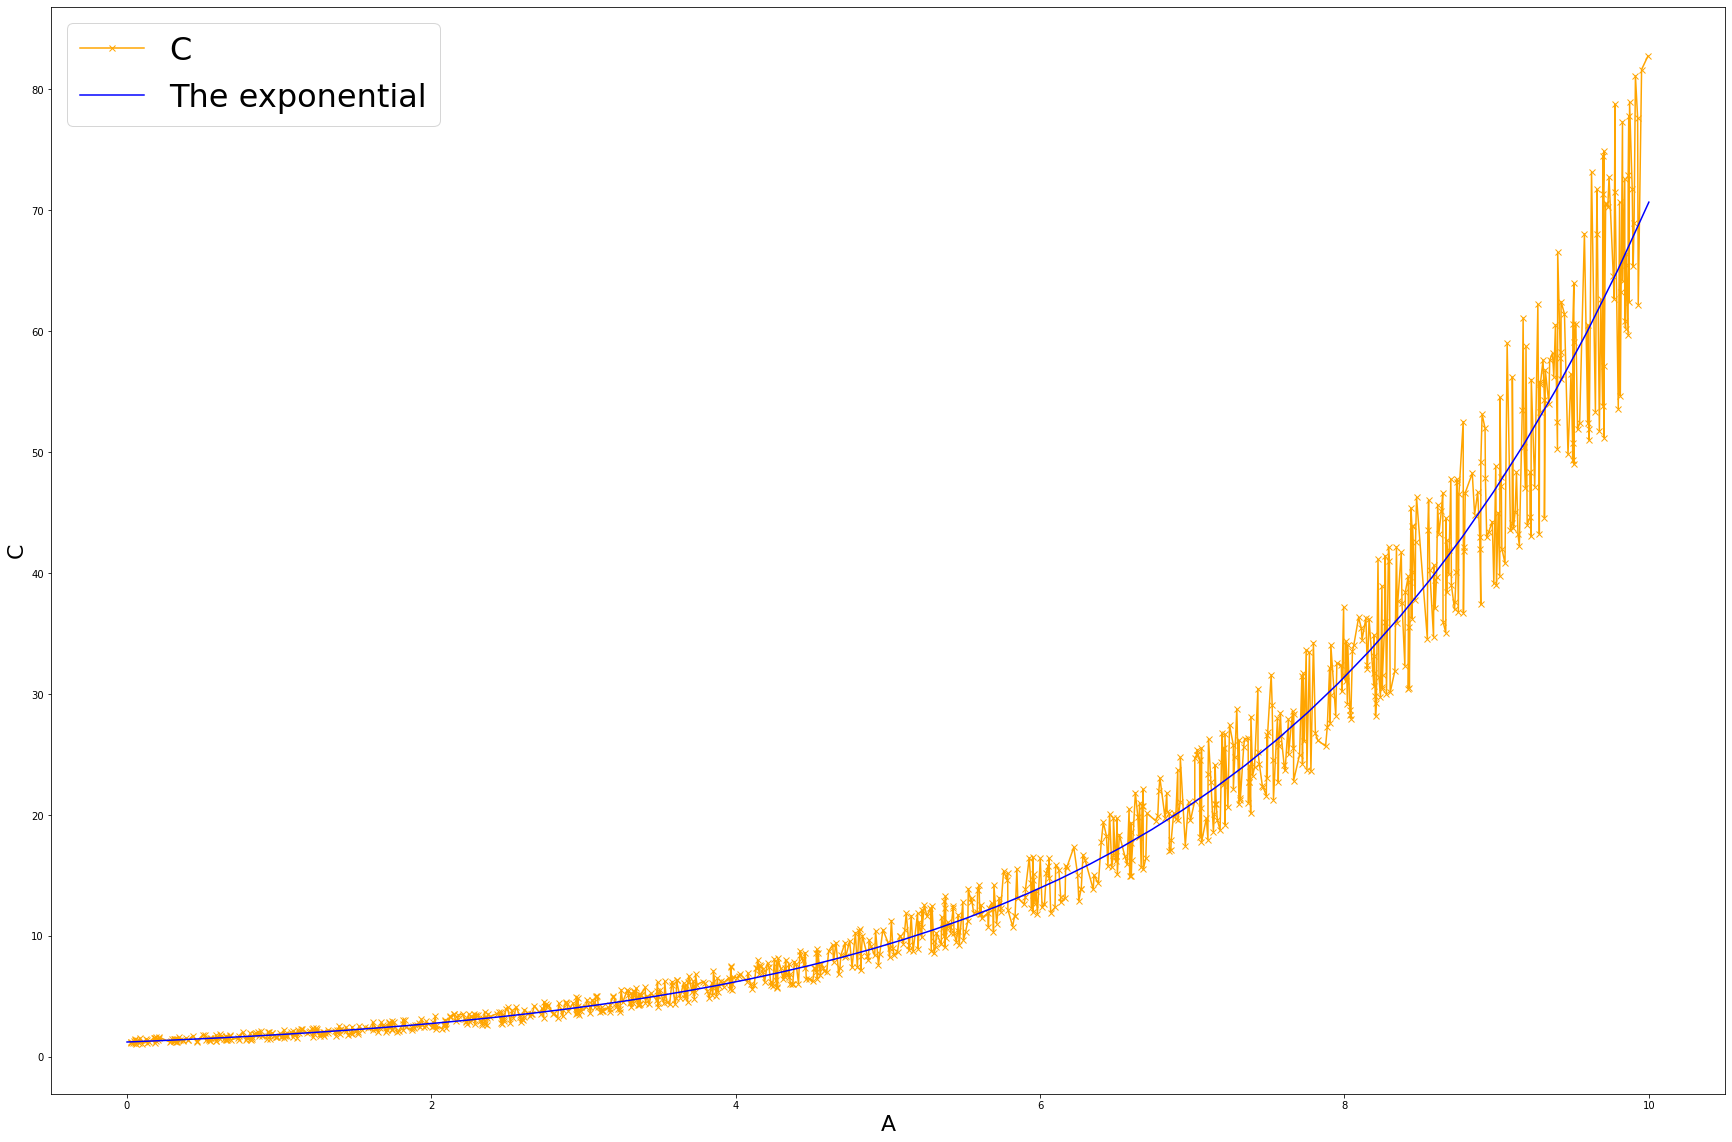

In [6]:
fit2 = np.polyfit(dfs.A, np.log(dfs.C), 1)
fit_line2 = np.poly1d(fit2)
print("Exponential:")
print(fit_line2[0],fit_line2[1])

def fexp(x,a,b):
    return np.exp(a*x)*np.exp(b)

plt.figure()

x = np.linspace(0, 10)
dfs.plot(x = 'A', y = 'C', marker='x',color='orange');

plt.plot(x,fexp(x,fit_line2[1],fit_line2[0]),'b', label='The exponential')
plt.xlabel("A",fontsize=22)
plt.ylabel('C', fontsize=22)



plt.legend(loc ="upper left", fontsize=32)

plt.show()